# The Effect of `adapt_object_mesh` iterations on Mean Smoothness Error

In [13]:
import pandas as pd
import seaborn as sns
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score

In [7]:
df = pd.read_csv('taubin_vs_smtherr.csv')

In [9]:
def reciprocal_func(x, a, h, k, n):
    return a / (x ** n - h) + k


def reciprocal_func_1(x, a, h, k):
    return reciprocal_func(x, a, h, k, n=1)


In [20]:
popt, pcov = curve_fit(reciprocal_func_1, df.taubin, df.smtherr)

def predicted_model(x):
    return reciprocal_func_1(x, *popt)

prediction = df.taubin.map(predicted_model)
r2 = r2_score(df.smtherr, prediction)
r2

0.9989693417210846

In [28]:
popt

array([  3.80278532, -10.02044118,   0.05659563])

<AxesSubplot:xlabel='taubin', ylabel='smtherr'>

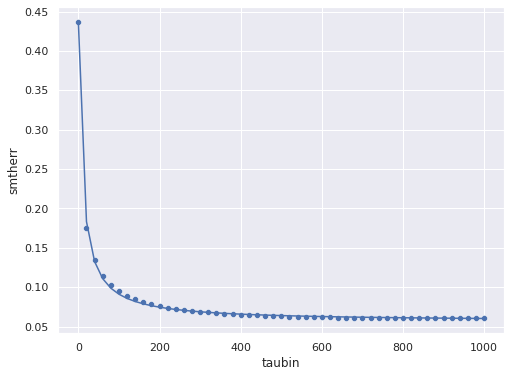

In [27]:
sns.set(rc={'figure.figsize':(8,6)})
ax = sns.scatterplot(df, x='taubin', y='smtherr')
sns.lineplot(x=df.taubin, y=prediction, ax=ax)

The relationship between `adapt_object_mesh` iterations of Taubin smoothing on `smtherr` is

$$
E_{smth}=\frac{3.8}{I_{\texttt{adapt_object_mesh}}+10}+0.06
$$